# Linear Regression with Synthetic Data

## Import relevant modules

In [6]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

## Define build and train model function

In [10]:
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model is a single node in a single layer. 
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure training to minimize the model's mean squared error. 
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate), # optimizer that implements the RMSprop algorithm.
                loss="mean_squared_error", # computes the mean of squares of errors between labels and predictions.
                metrics=[tf.keras.metrics.RootMeanSquaredError()])  # computes root mean squared error metric between 
                                                                    # y_true (label) and y_pred (prediction)

    return model           


def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

  # Feed the feature values and the label values to the model. 
  # The model will train for the specified number of epochs, gradually learning how the feature values relate to the label values. 
    history = model.fit(x=feature,
                        y=label,
                        batch_size=batch_size,
                        epochs=epochs)

  # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0] # w_1 in function y' = b + w_1.x_1
    trained_bias = model.get_weights()[1]   # w_0 or b

  # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean squared error at each epoch. 
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

## Define plotting functions

In [16]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""

  # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")

  # Plot the feature values vs. label values.
    plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)    # y' = b + w_1.x_1
    plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
    plt.show()

def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve, which shows loss vs. epoch."""

    plt.figure()
    
    # Label the axes.
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

## Define the dataset

In [17]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Specify the hyperparameters

### Examine the graphs

Epoch 1/10
1/1 [==============================] - 1s 504ms/step - loss: 371.6473 - root_mean_squared_error: 19.2782
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 361.6609 - root_mean_squared_error: 19.0174
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 354.5475 - root_mean_squared_error: 18.8294
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 348.6689 - root_mean_squared_error: 18.6727
Epoch 5/10
1/1 [==============================] - 0s 21ms/step - loss: 343.5071 - root_mean_squared_error: 18.5339
Epoch 6/10
1/1 [==============================] - 0s 33ms/step - loss: 338.8221 - root_mean_squared_error: 18.4071
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 334.4807 - root_mean_squared_error: 18.2888
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 330.3997 - root_mean_squared_error: 18.1769
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 326.5240 - 

/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


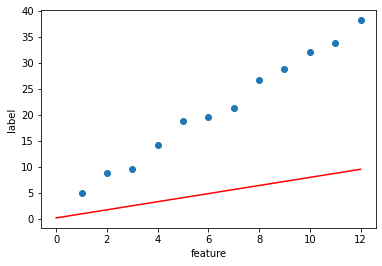

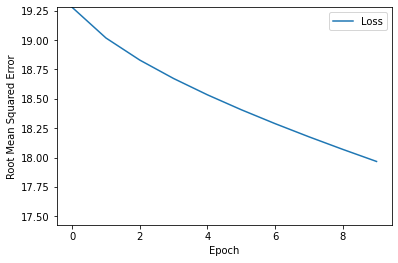

In [32]:
learning_rate = 0.01
epochs = 10
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

### Increase the number of epochs

Epoch 1/450


/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 436ms/step - loss: 782.8516 - root_mean_squared_error: 27.9795
Epoch 2/450
1/1 [==============================] - 0s 8ms/step - loss: 768.3208 - root_mean_squared_error: 27.7186
Epoch 3/450
1/1 [==============================] - 0s 5ms/step - loss: 757.9108 - root_mean_squared_error: 27.5302
Epoch 4/450
1/1 [==============================] - 0s 8ms/step - loss: 749.2722 - root_mean_squared_error: 27.3728
Epoch 5/450
1/1 [==============================] - 0s 6ms/step - loss: 741.6606 - root_mean_squared_error: 27.2334
Epoch 6/450
1/1 [==============================] - 0s 8ms/step - loss: 734.7310 - root_mean_squared_error: 27.1059
Epoch 7/450
1/1 [==============================] - 0s 10ms/step - loss: 728.2914 - root_mean_squared_error: 26.9869
Epoch 8/450
1/1 [==============================] - 0s 6ms/step - loss: 722.2224 - root_mean_squared_error: 26.8742
Epoch 9/450
1/1 [==============================] - 0s 5ms/step - loss: 716.4442 - root_me

/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


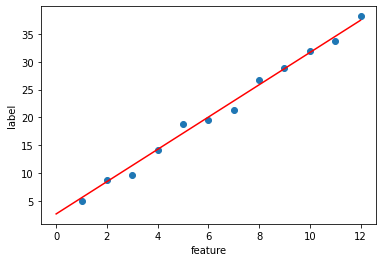

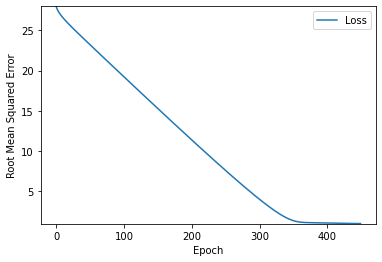

In [30]:
learning_rate = 0.01
epochs = 450
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

### Increase the learning rate

/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/450
1/1 [==============================] - 0s 498ms/step - loss: 1035.8335 - root_mean_squared_error: 32.1844
Epoch 2/450
1/1 [==============================] - 0s 6ms/step - loss: 6649766.0000 - root_mean_squared_error: 2578.7141
Epoch 3/450
1/1 [==============================] - 0s 18ms/step - loss: 1024.1167 - root_mean_squared_error: 32.0018
Epoch 4/450
1/1 [==============================] - 0s 7ms/step - loss: 6.0882 - root_mean_squared_error: 2.4674
Epoch 5/450
1/1 [==============================] - 0s 9ms/step - loss: 1.5238 - root_mean_squared_error: 1.2344
Epoch 6/450
1/1 [==============================] - 0s 7ms/step - loss: 1.4194 - root_mean_squared_error: 1.1914
Epoch 7/450
1/1 [==============================] - 0s 14ms/step - loss: 1.3822 - root_mean_squared_error: 1.1757
Epoch 8/450
1/1 [==============================] - 0s 8ms/step - loss: 1.3477 - root_mean_squared_error: 1.1609
Epoch 9/450
1/1 [==============================] - 0s 7ms/step - loss: 1.3139 - roo

/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


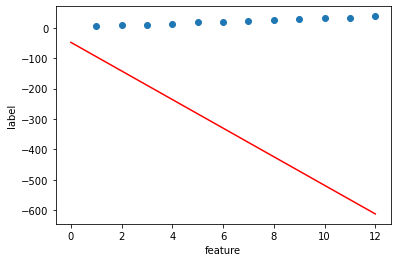

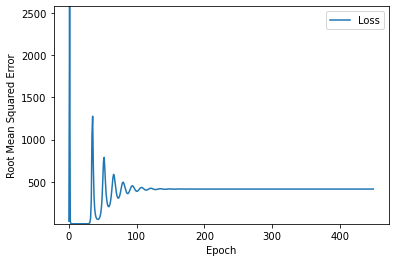

In [33]:
learning_rate = 100
epochs = 450
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

### Find the ideal combination of epochs and learning rate

Epoch 1/70


/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 408ms/step - loss: 670.6964 - root_mean_squared_error: 25.8978
Epoch 2/70
1/1 [==============================] - 0s 6ms/step - loss: 494.8844 - root_mean_squared_error: 22.2460
Epoch 3/70
1/1 [==============================] - 0s 9ms/step - loss: 391.8819 - root_mean_squared_error: 19.7960
Epoch 4/70
1/1 [==============================] - 0s 8ms/step - loss: 318.6989 - root_mean_squared_error: 17.8521
Epoch 5/70
1/1 [==============================] - 0s 10ms/step - loss: 262.5874 - root_mean_squared_error: 16.2045
Epoch 6/70
1/1 [==============================] - 0s 9ms/step - loss: 217.8113 - root_mean_squared_error: 14.7584
Epoch 7/70
1/1 [==============================] - 0s 8ms/step - loss: 181.2263 - root_mean_squared_error: 13.4620
Epoch 8/70
1/1 [==============================] - 0s 16ms/step - loss: 150.8908 - root_mean_squared_error: 12.2838
Epoch 9/70
1/1 [==============================] - 0s 7ms/step - loss: 125.5053 - root_mean_squa

/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


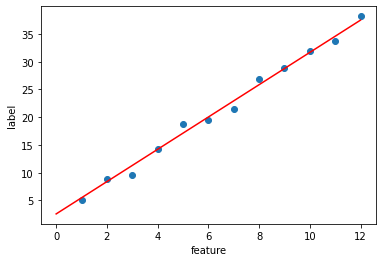

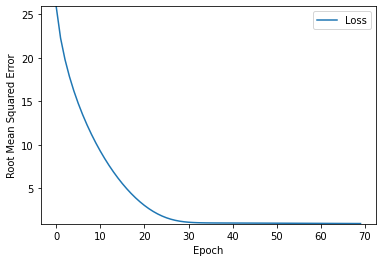

In [34]:
learning_rate = 0.14
epochs = 70
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/125


/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


12/12 [==============================] - 0s 3ms/step - loss: 1064.0277 - root_mean_squared_error: 32.6194
Epoch 2/125
12/12 [==============================] - 0s 4ms/step - loss: 783.7666 - root_mean_squared_error: 27.9958
Epoch 3/125
12/12 [==============================] - 0s 4ms/step - loss: 598.4778 - root_mean_squared_error: 24.4638
Epoch 4/125
12/12 [==============================] - 0s 4ms/step - loss: 443.3216 - root_mean_squared_error: 21.0552
Epoch 5/125
12/12 [==============================] - 0s 3ms/step - loss: 317.4653 - root_mean_squared_error: 17.8176
Epoch 6/125
12/12 [==============================] - 0s 4ms/step - loss: 214.2778 - root_mean_squared_error: 14.6382
Epoch 7/125
12/12 [==============================] - 0s 3ms/step - loss: 131.1322 - root_mean_squared_error: 11.4513
Epoch 8/125
12/12 [==============================] - 0s 3ms/step - loss: 72.7784 - root_mean_squared_error: 8.5310
Epoch 9/125
12/12 [==============================] - 0s 4ms/step - loss: 34.9

/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


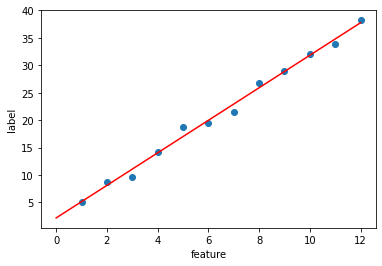

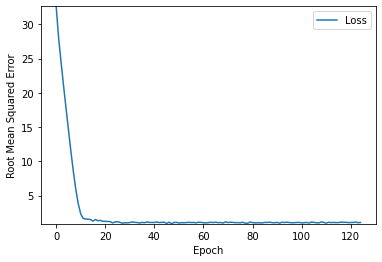

In [36]:
learning_rate = 0.05
epochs = 125
my_batch_size = 1 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)